## Overview
GPS trackers generally are pretty precise. In ideal situation they grant precision down to 5 meters. Meanwhile near constructions, bridges and in tunnels they can give false coordinates. In other words GPS works fine in middle of desert and in middle of ocean. While you in city you have good chances to have incorrect data from it. This script was created based on basic statistics knowledge and basic Python scripting skills. It analyzes and corrects set of coordinates. It is important to note that points should be gathered periodically so all internal calculations of distances will be correct.

In [85]:
import pandas as pd
import json

In [86]:
df = pd.read_csv('anomaly.csv')

In [87]:
df.drop('Elevation', axis=1, inplace=True)
df

,Latitude,Longitude
0,48.189265,17.036147
1,48.183028,17.039323
2,48.179136,17.044044
3,48.179766,17.050309
4,48.183142,17.047477
5,48.184973,17.042842
6,48.188750,17.041640
7,48.191439,17.035375
8,48.182570,17.010999
9,48.187320,17.033229


In [88]:
input_coordinates = json.loads(df.to_json(orient='records'))

In [89]:
from gps_normalizer import GpsNormalizer

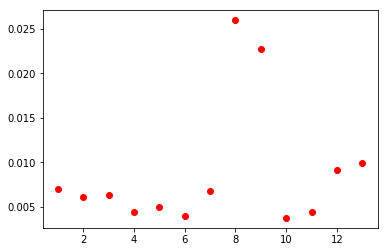

In [90]:
g2 = GpsNormalizer(input_coordinates)
g2.show_distribution(g2.add_distances(g2.initial_json).initial_json)

It is chart of distances passed between all points. It is obvious that one point in this set is incorrect and two distances are 3-4 times bigger than rest. Using mean value and standard deviation we can find outliers that exceed reasonable limits.

In [91]:
corrected_coordinates = g2.apply_default()

In [92]:
input_coordinates[8]

{'Latitude': 48.18256984, 'Longitude': 17.01099872}

In [93]:
corrected_coordinates[8]

{'Latitude': 48.18937953, 'Longitude': 17.034301755}

As result we have one corrected point on track.

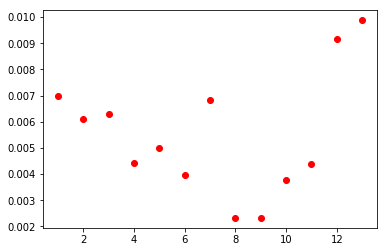

In [94]:
g2.show_distribution(g2.add_distances(g2.final_json).final_json)

Distances are much more reasonable now.